In [94]:
import pandas as pd

In [95]:
df = pd.read_csv("Datasets/telco_train.csv")
df.columns

Index(['Age', 'Avg Monthly GB Download', 'Avg Monthly Long Distance Charges',
       'Churn Category', 'Churn Reason', 'Churn Score', 'City', 'CLTV',
       'Contract', 'Country', 'Customer ID', 'Customer Status', 'Dependents',
       'Device Protection Plan', 'Gender', 'Internet Service', 'Internet Type',
       'Lat Long', 'Latitude', 'Longitude', 'Married', 'Monthly Charge',
       'Multiple Lines', 'Number of Dependents', 'Number of Referrals',
       'Offer', 'Online Backup', 'Online Security', 'Paperless Billing',
       'Partner', 'Payment Method', 'Phone Service', 'Population',
       'Premium Tech Support', 'Quarter', 'Referred a Friend',
       'Satisfaction Score', 'Senior Citizen', 'State', 'Streaming Movies',
       'Streaming Music', 'Streaming TV', 'Tenure in Months', 'Total Charges',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Refunds', 'Total Revenue', 'Under 30', 'Unlimited Data',
       'Zip Code', 'Churn'],
      dtype='object')

In [96]:
print(df['Zip Code'].value_counts())

Zip Code
92122    24
92027    24
92028    21
92117    21
92126    20
         ..
93249     1
92610     1
94087     1
95616     1
95683     1
Name: count, Length: 1594, dtype: int64


In [97]:
df = df.drop(['Churn Category','Churn Reason','Churn Score','City','Country','Customer ID','Customer Status','Lat Long', 'Latitude', 'Longitude','Population','Quarter','State','Zip Code'],axis=1)

In [98]:
df.isnull().sum()[df.isnull().sum() > 0]


Internet Type     886
Offer            2324
dtype: int64

In [99]:
df.fillna("None", inplace=True)


In [100]:
X = df.drop(['Churn'],axis=1)

In [108]:
X.columns

Index(['Age', 'Avg Monthly GB Download', 'Avg Monthly Long Distance Charges',
       'CLTV', 'Contract', 'Dependents', 'Device Protection Plan', 'Gender',
       'Internet Service', 'Internet Type', 'Married', 'Monthly Charge',
       'Multiple Lines', 'Number of Dependents', 'Number of Referrals',
       'Offer', 'Online Backup', 'Online Security', 'Paperless Billing',
       'Partner', 'Payment Method', 'Phone Service', 'Premium Tech Support',
       'Referred a Friend', 'Satisfaction Score', 'Senior Citizen',
       'Streaming Movies', 'Streaming Music', 'Streaming TV',
       'Tenure in Months', 'Total Charges', 'Total Extra Data Charges',
       'Total Long Distance Charges', 'Total Refunds', 'Total Revenue',
       'Under 30', 'Unlimited Data'],
      dtype='object')

In [107]:
import pprint

row_dict = X.iloc[0].to_json()
pprint.pprint(row_dict,width=1000) 

'{"Age":72,"Avg Monthly GB Download":4,"Avg Monthly Long Distance Charges":19.44,"CLTV":4849,"Contract":"Two Year","Dependents":0,"Device Protection Plan":1,"Gender":"Female","Internet Service":1,"Internet Type":"Fiber Optic","Married":1,"Monthly Charge":88.4,"Multiple Lines":0,"Number of Dependents":0,"Number of Referrals":1,"Offer":"None","Online Backup":1,"Online Security":0,"Paperless Billing":0,"Partner":1,"Payment Method":"Bank Withdrawal","Phone Service":1,"Premium Tech Support":0,"Referred a Friend":1,"Satisfaction Score":3,"Senior Citizen":1,"Streaming Movies":1,"Streaming Music":1,"Streaming TV":0,"Tenure in Months":25,"Total Charges":2191.15,"Total Extra Data Charges":0,"Total Long Distance Charges":486.0,"Total Refunds":0.0,"Total Revenue":2677.15,"Under 30":0,"Unlimited Data":1}'


In [72]:
y = df['Churn']

In [73]:
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

In [74]:
categorical_cols

['Contract', 'Gender', 'Internet Type', 'Offer', 'Payment Method']

In [75]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, drop='first')  
encoded_data = encoder.fit_transform(X[categorical_cols])

In [76]:
encoded_cols = encoder.get_feature_names_out(categorical_cols)

encoded_df = pd.DataFrame(encoded_data, columns=encoded_cols, index=X.index)

X = pd.concat([X.drop(columns=categorical_cols), encoded_df], axis=1)
print(X.columns)

Index(['Age', 'Avg Monthly GB Download', 'Avg Monthly Long Distance Charges',
       'CLTV', 'Dependents', 'Device Protection Plan', 'Internet Service',
       'Married', 'Monthly Charge', 'Multiple Lines', 'Number of Dependents',
       'Number of Referrals', 'Online Backup', 'Online Security',
       'Paperless Billing', 'Partner', 'Phone Service', 'Premium Tech Support',
       'Referred a Friend', 'Satisfaction Score', 'Senior Citizen',
       'Streaming Movies', 'Streaming Music', 'Streaming TV',
       'Tenure in Months', 'Total Charges', 'Total Extra Data Charges',
       'Total Long Distance Charges', 'Total Refunds', 'Total Revenue',
       'Under 30', 'Unlimited Data', 'Contract_One Year', 'Contract_Two Year',
       'Gender_Male', 'Internet Type_DSL', 'Internet Type_Fiber Optic',
       'Internet Type_None', 'Offer_Offer A', 'Offer_Offer B', 'Offer_Offer C',
       'Offer_Offer D', 'Offer_Offer E', 'Payment Method_Credit Card',
       'Payment Method_Mailed Check'],
      dt

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

models = {
    "Logistic": LogisticRegression(max_iter=1000),
    "RandomForest": RandomForestClassifier(),
    "GradientBoosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(eval_metric='logloss'),
    "LightGBM": LGBMClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "NaiveBayes": GaussianNB(),
    "MLP": MLPClassifier(max_iter=500)
}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for name, model in models.items():
    try:
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        acc = accuracy_score(y_test, preds)
        print(f"{name}: {acc:.2f}")
    except Exception as e:
        print(f"{name} failed: {e}")


c:\Users\saza\.conda\envs\langchain\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic: 0.94
RandomForest: 0.96
GradientBoosting: 0.96
XGBoost: 0.96
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 887, number of negative: 2493
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000686 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1905
[LightGBM] [Info] Number of data points in the train set: 3380, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.262426 -> initscore=-1.033397
[LightGBM] [Info] Start training from score -1.033397
LightGBM: 0.96
SVM: 0.72
KNN: 0.73
NaiveBayes: 0.83
MLP: 0.86


In [79]:
model = XGBClassifier(    max_depth=4,        # reduce complexity
    n_estimators=70,   # lower tree count
    learning_rate=0.1,  # smaller steps
    subsample=0.8,      # use 80% rows
    colsample_bytree=0.8,  # use 80% features
    reg_alpha=1,        # L1 regularization
    reg_lambda=1,       # L2 regularization
    eval_metric='logloss')


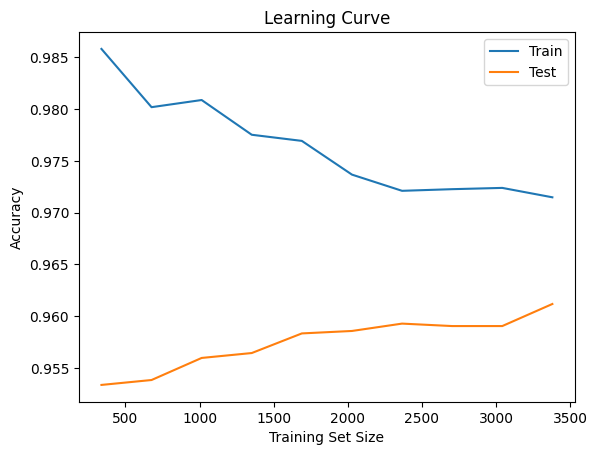

In [80]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.plot(train_sizes, train_mean, label="Train")
plt.plot(train_sizes, test_mean, label="Test")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Learning Curve")
plt.show()


In [81]:
import pickle

# Train your model
model.fit(X, y)

# Save model
with open("churn_value.pkl", "wb") as f:
    pickle.dump(model, f)
with open("churn_value_encoder.pkl", "wb") as f:
    pickle.dump(encoder, f)
with open("churn_value_categorical_columns.pkl", "wb") as f:
    pickle.dump(categorical_cols, f)
